# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [46]:
import pandas as pd 
import seaborn as sns

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [48]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [49]:
sinasc.loc[sinasc['APGAR5']<=3, 'APGAR5_CAT'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5']>=4) & (sinasc['APGAR5']<=5), 'APGAR5_CAT'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5']>=6) & (sinasc['APGAR5']<=7), 'APGAR5_CAT'] = 'asfixia leve'
sinasc.loc[sinasc['APGAR5']>=8, 'APGAR5_CAT'] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<AxesSubplot:xlabel='GESTACAO', ylabel='APGAR5'>

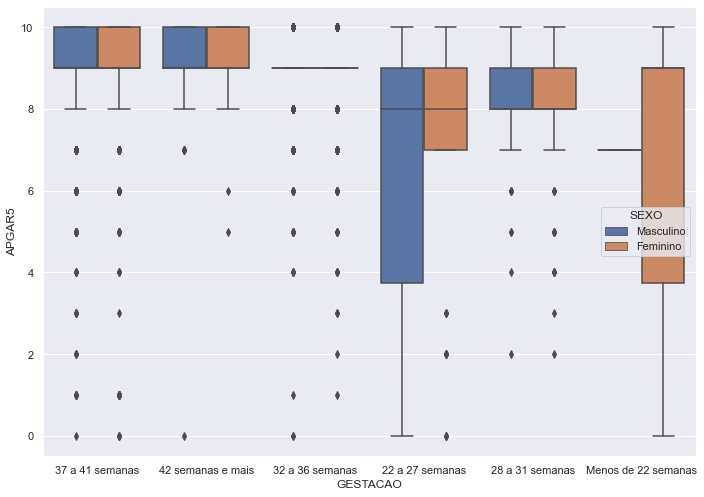

In [51]:
sns.boxplot(data=sinasc, x='GESTACAO',y='APGAR5',hue='SEXO')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [32]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [38]:
porc_line = freq.div(freq.sum(axis=1),axis=0)
porc_line

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

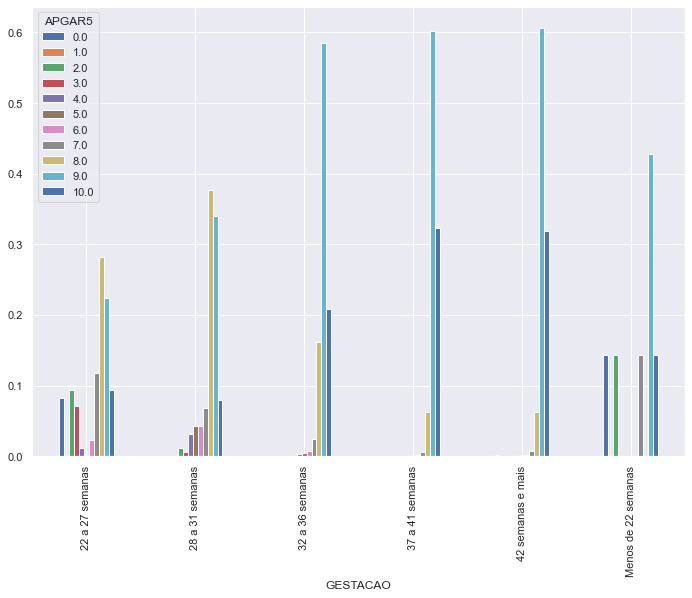

In [39]:
porc_line.plot.bar()

Podemos ver no grafico acima que ha um aumento drastico nos valores abaixo de 8 em bebes com menos de 37 semanas, devido a isto os medicos os classificao como prematuros 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='GESTACAO', ylabel='APGAR5'>

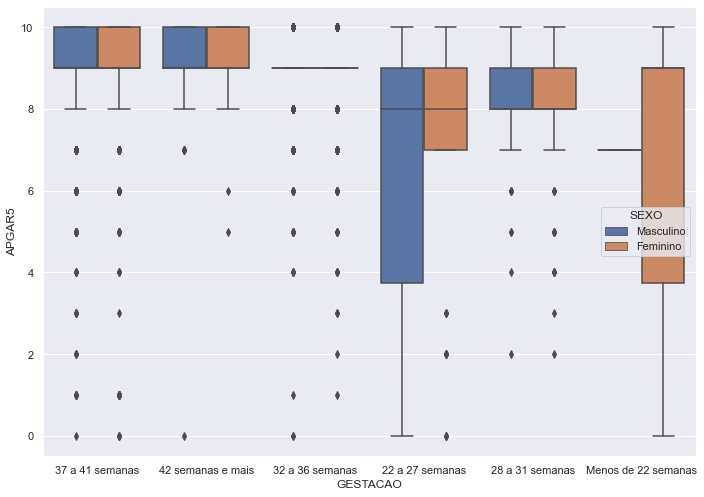

In [63]:
sns.boxplot(data=sinasc, x='GESTACAO',y='APGAR5',hue='SEXO')

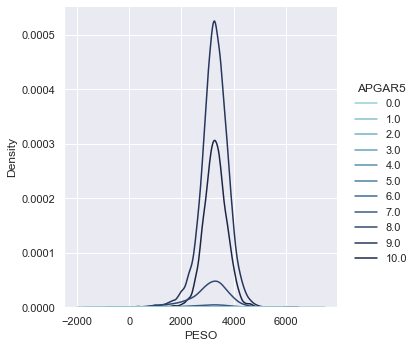

In [64]:
sns.displot(data=sinasc, x='PESO', hue='APGAR5',kind='kde', palette='ch:rot=-.25,hue=1,light=.75')